In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [5]:
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',encoding='utf-8-sig')
df = pd.read_csv('/Users/Delta/Downloads/trip_data_4.csv')
#df = pd.read_csv('/Users/Delta/Downloads/trip_data_4.csv',nrows=200)   #skiprows=100
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',nrows=2,encoding='utf-8-sig')   #skiprows=100

/Users/Delta/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.shape

(15100468, 14)

In [7]:
peek=df.head(5)

In [8]:
peek

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082


In [9]:
df.dtypes

medallion               object
 hack_license           object
 vendor_id              object
 rate_code               int64
 store_and_fwd_flag     object
 pickup_datetime        object
 dropoff_datetime       object
 passenger_count         int64
 trip_time_in_secs       int64
 trip_distance         float64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
dtype: object

In [11]:
df.isnull().sum()

medallion                    0
 hack_license                0
 vendor_id                   0
 rate_code                   0
 store_and_fwd_flag    7518657
 pickup_datetime             0
 dropoff_datetime            0
 passenger_count             0
 trip_time_in_secs           0
 trip_distance               0
 pickup_longitude            0
 pickup_latitude             0
 dropoff_longitude         146
 dropoff_latitude          146
dtype: int64

In [12]:
df.isna().sum()

medallion                    0
 hack_license                0
 vendor_id                   0
 rate_code                   0
 store_and_fwd_flag    7518657
 pickup_datetime             0
 dropoff_datetime            0
 passenger_count             0
 trip_time_in_secs           0
 trip_distance               0
 pickup_longitude            0
 pickup_latitude             0
 dropoff_longitude         146
 dropoff_latitude          146
dtype: int64

In [43]:
pickup_dt=pd.to_datetime(df[' pickup_datetime'])
#pickup_dt=pd.Timestamp(df[' pickup_datetime'])

In [51]:
#pickup_dt.astype('datetime64[s]')
[pickup_dt.dt.hour, pickup_dt.dt.minute]

[0      18
 1       7
 2      17
 3      18
 4      20
 5       2
 6       6
 7       6
 8      19
 9      18
 10     18
 11     18
 12     18
 13     19
 14     19
 15     14
 16     14
 17      7
 18     20
 19     20
 20     18
 21     18
 22     19
 23     19
 24     19
 25      0
 26     18
 27     18
 28     18
 29     20
        ..
 170    23
 171    23
 172    23
 173    23
 174    23
 175    23
 176    23
 177    23
 178    23
 179    23
 180    23
 181    23
 182    23
 183    23
 184    23
 185    23
 186    23
 187    23
 188    23
 189    23
 190    23
 191    23
 192    23
 193    23
 194    22
 195    22
 196    22
 197    22
 198     1
 199     1
 Name:  pickup_datetime, Length: 200, dtype: int64, 0      47
 1       8
 2      59
 3      12
 4      12
 5      48
 6      16
 7      20
 8      20
 9       5
 10      4
 11      7
 12      2
 13     19
 14     12
 15     42
 16     56
 17     23
 18     17
 19     22
 20     40
 21     42
 22      5
 23     24
 24     30
 25

In [44]:
pickup_dt.hour()

AttributeError: 'Series' object has no attribute 'hour'

In [10]:
df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510032e+07,1.510032e+07
mean,1.033242e+00,1.709030e+00,7.466081e+02,2.862899e+00,-7.273425e+01,4.006861e+01,-7.269257e+01,4.004795e+01
std,3.451167e-01,1.385621e+00,5.504414e+02,3.344187e+00,9.731627e+00,6.956628e+00,9.858587e+00,6.977638e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.323420e+03,-3.481141e+03,-2.771290e+03,-3.547898e+03
25%,1.000000e+00,1.000000e+00,3.600000e+02,1.040000e+00,-7.399213e+01,4.073512e+01,-7.399143e+01,4.073417e+01
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.780000e+00,-7.398172e+01,4.075281e+01,-7.398007e+01,4.075333e+01
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396676e+01,4.076754e+01,-7.396362e+01,4.076832e+01
max,2.100000e+02,9.000000e+00,1.080000e+04,1.000000e+02,2.228722e+03,3.210393e+03,2.228746e+03,3.577126e+03


In [13]:
df.columns

Index(['medallion', ' hack_license', ' vendor_id', ' rate_code',
       ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_time_in_secs', ' trip_distance',
       ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',
       ' dropoff_latitude'],
      dtype='object')

In [10]:
#payment_type = df.groupby(' payment_type').count()

In [11]:
#payment_type

In [12]:
#df[' payment_type'].hist()

In [13]:
#pyplot.show()

In [14]:
df[' passenger_count'].unique()

array([1, 2, 3, 4, 5, 6, 0, 9, 8])

In [15]:
#df[' payment_type'].value_counts()

In [17]:
passengercount=df[' passenger_count'].value_counts()

In [18]:
passengercount

1    10707072
2     1985742
5      890115
3      609849
6      609313
4      298146
0         229
9           1
8           1
Name:  passenger_count, dtype: int64

Text(0.5,1,'Count of passenger_count')

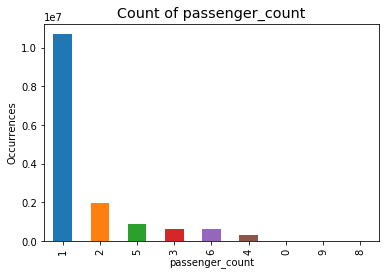

In [19]:
passengercount.plot(kind='bar')   #paytype.hist()
plt.xlabel('passenger_count')
plt.ylabel('Occurrences')
plt.title('Count of passenger_count',size='x-large')

In [20]:
vendorid=df[' vendor_id'].value_counts()

In [21]:
vendorid

CMT    7582525
VTS    7517943
Name:  vendor_id, dtype: int64

In [23]:
ratecode=df[' rate_code'].value_counts()

In [24]:
ratecode

1      14768828
2        254687
5         39118
3         21937
4         14566
0          1145
6           164
210          14
65            2
8             2
208           1
206           1
77            1
9             1
7             1
Name:  rate_code, dtype: int64

In [25]:
storefwdflag=df[' store_and_fwd_flag'].value_counts()

In [26]:
storefwdflag

N    7451841
Y     129970
Name:  store_and_fwd_flag, dtype: int64

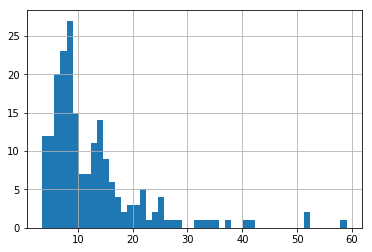

In [35]:
df[' fare_amount'].hist(bins=50)

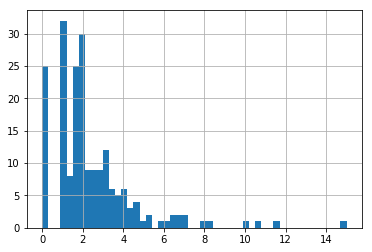

In [34]:
df[' tip_amount'].hist(bins=50)

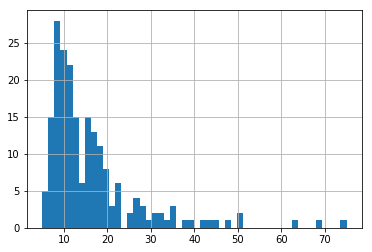

In [31]:
df[' total_amount'].hist(bins=50)

In [ ]:
dff

In [ ]:
df.isnull().sum()

In [ ]:
#df['payment_type'].isnull().sum()
df['payment_type'].isna().sum()

In [ ]:
newdf = df[df.columns[4:5]]

In [ ]:
newdf

In [ ]:
newdf['payment_type'].unique()

In [ ]:
np.unique(newdf,return_counts=True)

In [ ]:
np.unique(df['payment_type'])

In [ ]:
df.columns

In [ ]:
#df.rename(columns={})